<a href="https://colab.research.google.com/github/mengkala/myproject/blob/main/KPMG_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis


## Importing Libraries

### Libarary

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

## Data Loading





In [ ]:
# Loading dataset
transaction_df= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions',skiprows=1)
new_customer_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList',skiprows=1)
customer_demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customer_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress',skiprows=1)

In [ ]:
# Display the first 5 rows of the DataFrame transaction_df
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
# Display the first 5 rows of the DataFrame new_customer_list
new_customer_list.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.725000,0.616250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.80,0.8000,1.000000,1.000000,4,4,1.703125


In [ ]:
# Display the first 5 rows of the DataFrame customer_demographic
customer_demographic.head(5)

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
# Display the first 5 rows of the DataFrame customer_address
customer_address.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
# Convert transaction_date to datetime
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'], unit='s')

# Display the first few dates
transaction_df['transaction_date'].head()

,transaction_date
0,2017-02-25
1,2017-05-21
2,2017-10-16
3,2017-08-31
4,2017-10-01


In [ ]:
# Convert past_3_years_bike_related_purchases to datetime
customer_demographic['past_3_years_bike_related_purchases'] = pd.to_datetime(customer_demographic['past_3_years_bike_related_purchases'], unit='s')

# Display the first few dates
customer_demographic['past_3_years_bike_related_purchases'].head()

,past_3_years_bike_related_purchases
0,1970-01-01 00:00:59
1,1970-01-01 00:01:11
2,1970-01-01 00:00:08
3,1970-01-01 00:00:53
4,1970-01-01 00:00:42


##  Merge Transactions,CustomerDemographic,CustomerAddress table from excel sheet

In [ ]:
# Ensure Transactions,CustomerDemographic,CustomerAddress have same unique ID
transaction_df['customer_id'].is_unique
customer_demographic['customer_id'].is_unique
customer_address['customer_id'].is_unique

True

In [ ]:
# merged transaction_df,customer_demographic table first as 'merged_data1'
merged_data1 = pd.merge(transaction_df,customer_demographic,on = 'customer_id', how = 'left').reset_index().sort_values(['customer_id'])
merged_data1

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
14485,14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,...,Female,1970-01-01 00:01:33,1953-10-12 00:00:00,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
18969,18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,...,Female,1970-01-01 00:01:33,1953-10-12 00:00:00,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
16422,16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,...,Female,1970-01-01 00:01:33,1953-10-12 00:00:00,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
5156,5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,...,Female,1970-01-01 00:01:33,1953-10-12 00:00:00,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
13423,13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,...,Female,1970-01-01 00:01:33,1953-10-12 00:00:00,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2462,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,...,Female,1970-01-01 00:01:11,1967-07-21 00:00:00,52.0,NaN,Entertainment,Affluent Customer,N,No,17.0
8415,8415,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,...,Female,1970-01-01 00:01:11,1967-07-21 00:00:00,52.0,NaN,Entertainment,Affluent Customer,N,No,17.0
8707,8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16700,16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# After merged_data1 summary of information about a DataFrame
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 14485 to 17468
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                20000 non-null  int64         
 1   transaction_id                       20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   customer_id                          20000 non-null  int64         
 4   transaction_date                     20000 non-null  datetime64[ns]
 5   online_order                         19640 non-null  float64       
 6   order_status                         20000 non-null  object        
 7   brand                                19803 non-null  object        
 8   product_line                         19803 non-null  object        
 9   product_class                        19803 non-null  object        
 10  product_siz

In [ ]:
# Merged merged_data1, customer_address as 'merged_data2'
merged_data2=pd.merge(merged_data1, customer_address, on='customer_id',how='left').sort_values(['customer_id'])
merged_data2

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
10,13643,13644,25,1,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
9,15662,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
7,3764,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
6,14930,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19835,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100.0,NSW,Australia,10.0
19996,8415,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,...,Entertainment,Affluent Customer,N,No,17.0,9491 Green Ridge Terrace,2100.0,NSW,Australia,10.0
19998,16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop index column in 'merged_data2' table
merged_data2.drop(columns=['index'],inplace=True)
merged_data2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
10,13644,25,1,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
9,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
7,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
6,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0


In [ ]:
# To move the customer_id column from its current position (the third column) to the first position in merged_data2

# Extract the 'customer_id' column
customer_id_column = merged_data2['customer_id']

# Drop the 'customer_id' column from the merged_data2
merged_data2.drop(columns=['customer_id'], inplace=True)

# Insert the 'customer_id' column at the beginning of the merged_data2
# 0: This is the position at which you want to insert the customer_id column,
# In this case, 0 means the very first position
merged_data2.insert(0, 'customer_id', customer_id_column)

# Display merged_data2 first 5 rows
merged_data2.head(20)

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,14486,23,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
10,1,13644,25,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
9,1,15663,32,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
7,1,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
6,1,14931,31,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
8,1,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
4,1,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
3,1,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
2,1,16423,9,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,1,18970,11,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0


In [ ]:
# Merged_data2 summary of information
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20000 non-null  int64         
 1   transaction_id                       20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price     

## New merged_data2 Summary Of Information

**Shape:** The New merged_data2 has 20,000 entries (rows) and 29 columns.

**Index:** The index is a default integer index ranging from 0 to 19,999.

**Data Types:** There are 3 integer columns, 9 float columns, 1 datetime column, and 16 object (categorical or string) columns.

**Missing Values:** Several columns have missing values, indicated by the Non-Null Count being less than the total number of entries (20,000).


## Data Cleaning and Data Preprocess

In [ ]:
# Checking before numerical missing values
merged_data2.isnull().sum()

,0
customer_id,0
transaction_id,0
product_id,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


In [ ]:
# Get the data types of all columns
column_dtypes = merged_data2.dtypes

# Classify columns based on their data types
# The lambda function checks if the data type(dtype) is a sub_type of np.number, which includes integer and floating - point types
# Mean of index.tolist(), this extracts the index of the filtered series
numerical_columns = column_dtypes[column_dtypes.apply(lambda dtype: np.issubdtype(dtype,np.number))].index.tolist()
categorical_columns = column_dtypes[column_dtypes.apply(lambda dtype: not np.issubdtype(dtype,np.number))].index.tolist()

# Print the results
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")  # starting on a new line due to the \n newline character.
print(categorical_columns)

Numerical Columns:
['customer_id', 'transaction_id', 'product_id', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date', 'age', 'tenure', 'postcode', 'property_valuation']

Categorical Columns:
['transaction_date', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'address', 'state', 'country']


In [ ]:
# List of numerical columsn
numerical_columns = ['online_order',
                      'list_price',
                     'standard_cost',
                     'age',
                     'past_3_years_bike_related_purchases',
                     'tenure',
                     'postcode',
                     'property_valuation']

# Check the number of missing values before filling
missing_before = merged_data2[numerical_columns].isnull().sum()

# Filling numerical missing values with the mean or median
for col in numerical_columns:          # col represents the name of one numerical column
    mean_value = merged_data2[col].mean() # .mean() computes the mean value of the selected column
    merged_data2[col].fillna(mean_value, inplace=True)

# Checking the number of missing valye after filling
missing_after = merged_data2[numerical_columns].isnull().sum()

# Print the results
print("Number of missing values before fiiling:\n", missing_before)
print("Number of missing values after filling:\n", missing_after)

Number of missing values before fiiling:
 online_order                           360
list_price                               0
standard_cost                          197
age                                     12
past_3_years_bike_related_purchases      3
tenure                                 449
postcode                                32
property_valuation                      32
dtype: int64
Number of missing values after filling:
 online_order                           0
list_price                             0
standard_cost                          0
age                                    0
past_3_years_bike_related_purchases    0
tenure                                 0
postcode                               0
property_valuation                     0
dtype: int64


In [ ]:
# Filling categorical missing values with the mode
categorical_columns = ['name',
                       'gender',
                       'brand',
                       'product_line',
                       'product_class',
                       'product_size',
                       'DOB',
                       'job_title',
                       'job_industry_category',
                       'wealth_segment',
                       'deceased_indicator',
                       'owns_car',
                       'address',
                       'state',
                       'country',
                       'product_first_sold_date']

# Check the number of missing values before filling
missing_before = merged_data2[categorical_columns].isnull().sum()

# Filling categorical missing values with the mode
for col in categorical_columns:
    mode_value = merged_data2[col].mode()[0]
    merged_data2[col].fillna(mode_value, inplace=True)

# Check the number of missing values after filling
missing_after = merged_data2[categorical_columns].isnull().sum()

# Print the results
print("Number of missing values before filling:\n", missing_before)
print("\nNumber of missing values after filling:\n", missing_after)

Number of missing values before filling:
 name                          3
gender                        3
brand                       197
product_line                197
product_class               197
product_size                197
DOB                         449
job_title                  2397
job_industry_category      3232
wealth_segment                3
deceased_indicator            3
owns_car                      3
address                      32
state                        32
country                      32
product_first_sold_date     197
dtype: int64

Number of missing values after filling:
 name                       0
gender                     0
brand                      0
product_line               0
product_class              0
product_size               0
DOB                        0
job_title                  0
job_industry_category      0
wealth_segment             0
deceased_indicator         0
owns_car                   0
address                    0
state         

In [ ]:
# Checking after numerical missing values
merged_data2.isnull().sum()

,0
customer_id,0
transaction_id,0
product_id,0
transaction_date,0
online_order,0
order_status,0
brand,0
product_line,0
product_class,0
product_size,0


In [ ]:
# After Cleaning and fill missing date of summary
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20000 non-null  int64         
 1   transaction_id                       20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price     

In [ ]:
# Display float_columns
float_columns = merged_data2.select_dtypes(include=['float64']).columns.tolist()
print(float_columns)

['online_order', 'list_price', 'standard_cost', 'product_first_sold_date', 'age', 'tenure', 'postcode', 'property_valuation']


In [ ]:
# Convert float columns to integers after ensuring they are whole numbers
for col in float_columns:
    # Check if the column can be safely converted to an integer
    if merged_data2[col].apply(lambda x: x.is_integer()).all():
        merged_data2[col] = merged_data2[col].astype(int)
    else:
        print(f"Warning: Column '{col}' contains non-integer values and cannot be safely converted to int.")

# Display the first few rows of the DataFrame to ensure the conversion
merged_data2.head()

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,14486,23,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
10,1,13644,25,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
9,1,15663,32,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
7,1,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
6,1,14931,31,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0


In [ ]:
import numpy as np

# List of columns with float data types
float_columns = ['online_order', 'list_price', 'standard_cost', 'age', 'tenure', 'postcode', 'property_valuation']

# Decide on the method to convert floats to integers
method = 'round'  # Can also be 'truncate', 'floor', or 'ceil'

for col in float_columns:
    if method == 'round':
        merged_data2[col] = np.round(merged_data2[col]).astype(int)
    elif method == 'truncate':
        merged_data2[col] = merged_data2[col].astype(int)
    elif method == 'floor':
        merged_data2[col] = np.floor(merged_data2[col]).astype(int)
    elif method == 'ceil':
        merged_data2[col] = np.ceil(merged_data2[col]).astype(int)
    else:
        raise ValueError("Invalid method selected. Choose one of: 'round', 'truncate', 'floor', 'ceil'")

# Display the first few rows of the DataFrame to ensure the conversion
merged_data2.head()

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,14486,23,2017-03-27,0,Approved,Norco Bicycles,Mountain,low,small,...,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
10,1,13644,25,2017-05-19,0,Approved,Giant Bicycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
9,1,15663,32,2017-06-04,1,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
7,1,3765,38,2017-04-06,1,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
6,1,14931,31,2017-12-14,1,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10


In [ ]:
# Display after convert float data type to int
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20000 non-null  int64         
 1   transaction_id                       20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  int64         
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price     

In [ ]:
# Summary Statistics
merged_data2.describe()

,customer_id,transaction_id,product_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,age,tenure,postcode,property_valuation
count,20000.000000,20000.000000,20000.00000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1738.246050,10000.500000,45.36465,2017-07-01 14:08:05.280000,0.509450,1107.836100,556.053600,38157.216900,1970-01-01 00:00:48.772465869,44.024500,10.690350,2987.623950,7.517150
min,1.000000,1.000000,0.00000,2017-01-01 00:00:00,0.000000,12.000000,7.000000,33259.000000,1970-01-01 00:00:00,18.000000,1.000000,2000.000000,1.000000
25%,857.750000,5000.750000,18.00000,2017-04-01 00:00:00,0.000000,575.000000,215.000000,35560.000000,1970-01-01 00:00:24,33.000000,6.000000,2200.000000,6.000000
50%,1736.000000,10000.500000,44.00000,2017-07-03 00:00:00,1.000000,1164.000000,508.000000,38206.000000,1970-01-01 00:00:48,43.000000,11.000000,2768.000000,8.000000
75%,2613.000000,15000.250000,72.00000,2017-10-02 00:00:00,1.000000,1635.000000,795.000000,40672.000000,1970-01-01 00:01:13,53.000000,15.000000,3752.000000,10.000000
max,5034.000000,20000.000000,100.00000,2017-12-30 00:00:00,1.000000,2091.000000,1760.000000,42710.000000,1970-01-01 00:01:39,120.000000,22.000000,4883.000000,12.000000
std,1011.951046,5773.647028,30.75359,NaN,0.499923,582.807956,403.935893,2892.652428,NaN,16.942941,5.612517,850.625295,2.822588


## Exploratory Data Analysis (EDA):


### Customer Demographics:

<Axes: xlabel='age', ylabel='Count'>

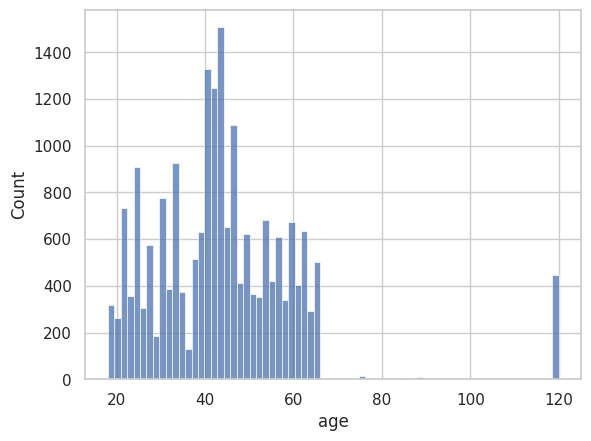

In [ ]:
# Histogram for age
sns.histplot(merged_data2['age'])

Age Summary Statistics:
count    20000.000000
mean        44.024500
std         16.942941
min         18.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        120.000000
Name: age, dtype: float64

Gender Counts:
gender
Female    10014
Male       9531
U           455
Name: count, dtype: int64


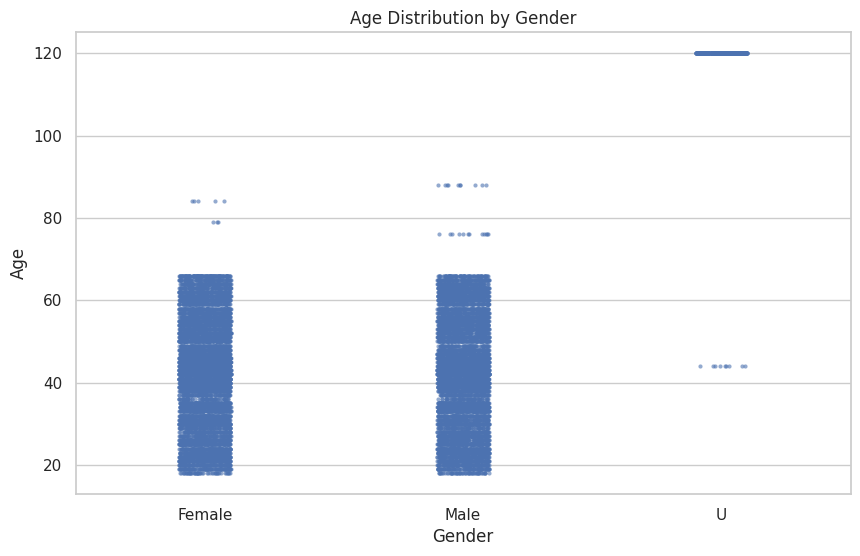

In [ ]:
# Summary statistics for age
age_summary = merged_data2['age'].describe()
print("Age Summary Statistics:")
print(age_summary)

# Counts for gender
gender_counts = merged_data2['gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)

# Strip plot for age by gender
plt.figure(figsize=(10, 6))
sns.stripplot(x='gender', y='age', data=merged_data2, jitter=True, size=3, alpha=0.6)    # hue, by brand and own car
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

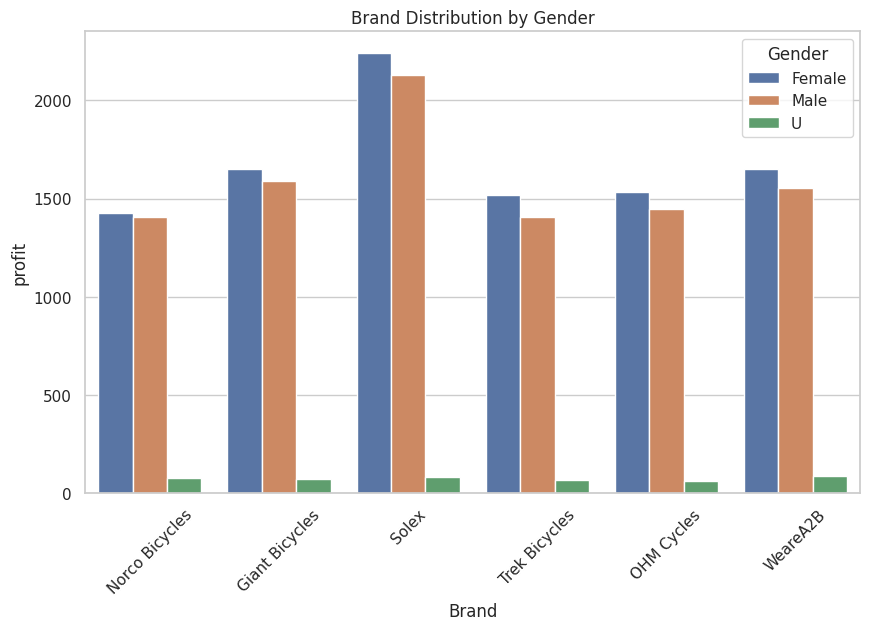

In [ ]:
# Set the style of the plots
sns.set(style="whitegrid")

# Brand distribution by gender
plt.figure(figsize=(10,6))
sns.countplot(x='brand', hue='gender',data=merged_data2)      # unkowe is missing value, male
plt.title('Brand Distribution by Gender')
plt.xlabel('Brand')
plt.ylabel('profit')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<ipython-input-170-8e21bd6ce8b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender',


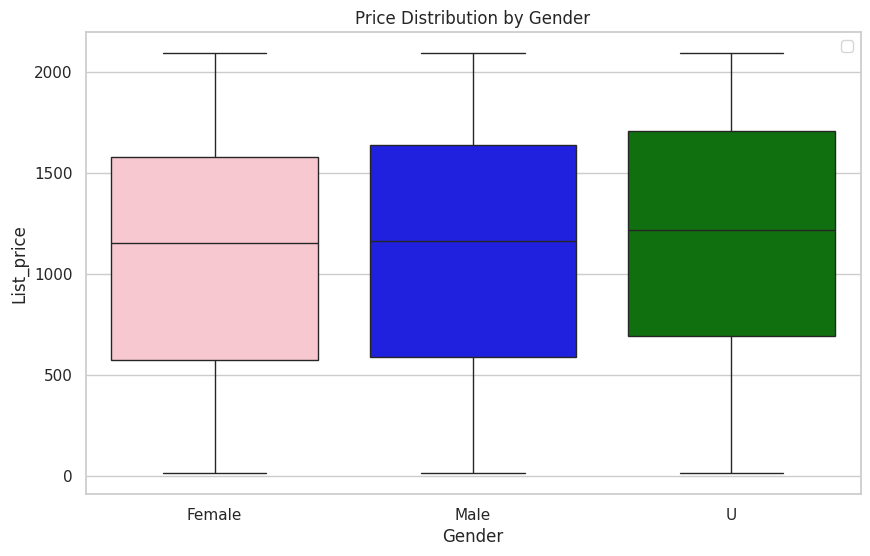

In [ ]:
# Set the style of the plots
sns.set(style="whitegrid")

# Price distribution by gender
plt.figure(figsize=(10,6))
sns.boxplot(x='gender',
            y='list_price',
            data=merged_data2,
            palette={'Male':'blue', 'Female':'pink','U':'green'})
plt.title('Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('List_price')
plt.legend(loc='best')
plt.show()

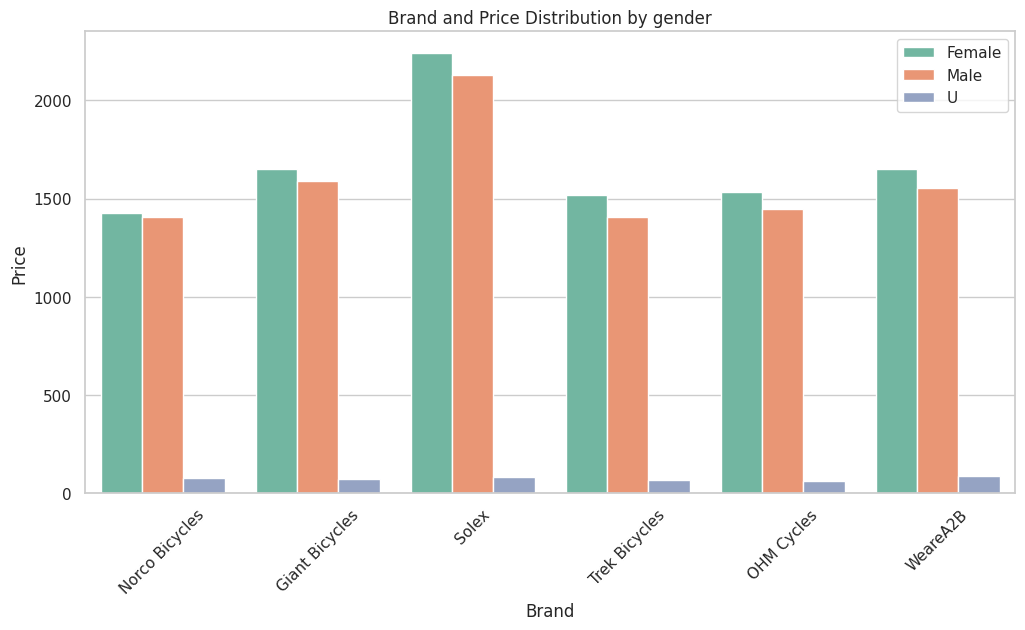

In [ ]:
# Brand and price distribution by gender
plt.figure(figsize=(12,6))
sns.countplot(x='brand',
            hue='gender',
            data=merged_data2,
            palette='Set2')
plt.title('Brand and Price Distribution by gender')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.legend(loc='best')
plt.show()

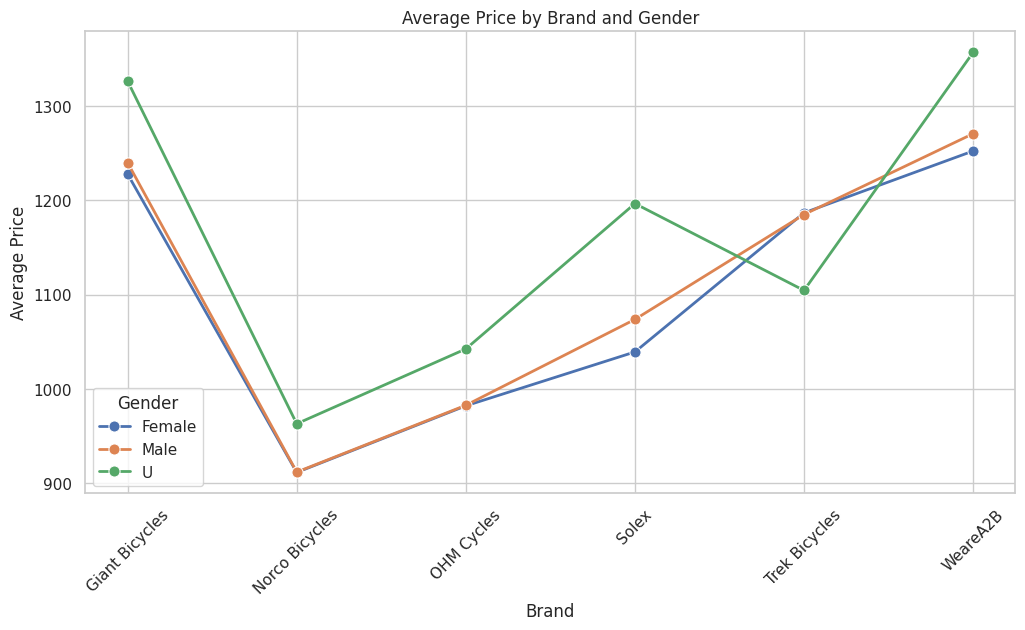

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group the data by brand and gender, and calculate the mean list_price
grouped_data = merged_data2.groupby(['brand', 'gender']).agg({'list_price': 'mean'}).reset_index()

# Pivot the data to have brands as columns and genders as lines
pivot_data = grouped_data.pivot(index='brand', columns='gender', values='list_price').reset_index()

# Set the style of the plots
sns.set(style="whitegrid")

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_data.melt(id_vars=["brand"],
                                  var_name="gender",
                                  value_name="Average Price"),
                                  x='brand',
                                  y='Average Price',
                                  hue='gender',
                                  marker='o',
                                  markersize=8,
                                  linewidth=2)
plt.title('Average Price by Brand and Gender')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### Which brand generates the most profit?

<ipython-input-173-6da34e6f1fbc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='average_profit', data=profit_by_brand,palette=colors)


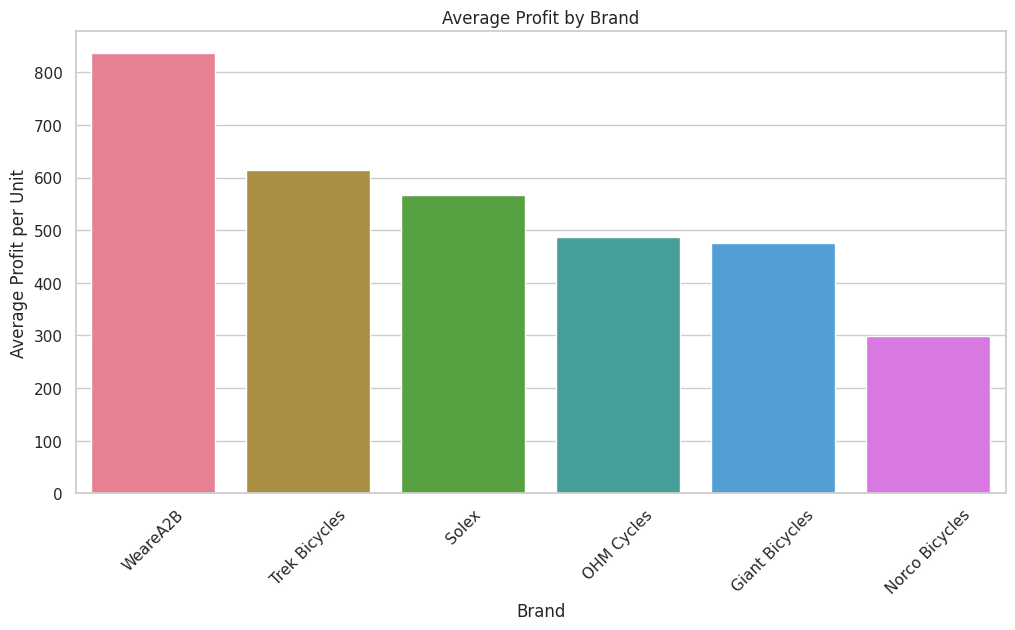

In [ ]:
# Calculate average profit for each sales
merged_data2['profit'] = merged_data2['list_price'] - merged_data2['standard_cost']

# Aggregate the data by brand and summing profits and counting units sold
profit_by_brand = merged_data2.groupby('brand').agg({'profit':'sum','list_price':'count'}).reset_index()

# Rename columns for clarity
profit_by_brand.columns= ['brand','total_profit','units_sold']

# Calculate the average profit per unit sold
profit_by_brand['average_profit'] = profit_by_brand['total_profit'] / profit_by_brand['units_sold']

# Sort the brands by average profit in descending order
profit_by_brand = profit_by_brand.sort_values(by='average_profit', ascending=False)

# Set the style of the plots
sns.set(style="whitegrid")

# Ensure that the number of colors matches the number of brands
num_brands = len(profit_by_brand)
colors = sns.color_palette("husl", num_brands)

# Bar plot for average profit by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='average_profit', data=profit_by_brand,palette=colors)
plt.title('Average Profit by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Profit per Unit')
plt.xticks(rotation=45)
plt.show()

# average profit

## Transaction Analysis:

Text(0, 0.5, 'Frequency')

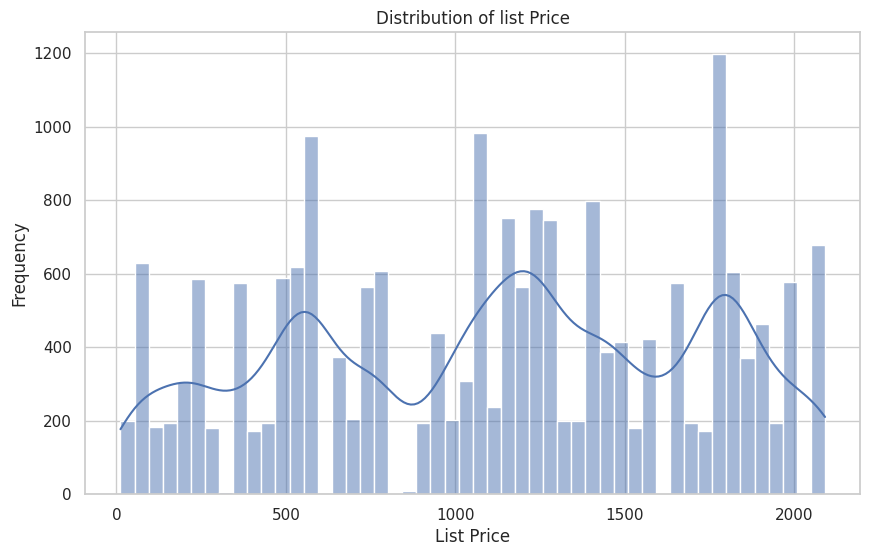

In [ ]:
# Distribution of list price
plt.figure(figsize=(10,6))
sns.histplot(data=merged_data2, x='list_price', bins=50, kde=True)
plt.title('Distribution of list Price')
plt.xlabel('List Price')
plt.ylabel('Frequency')

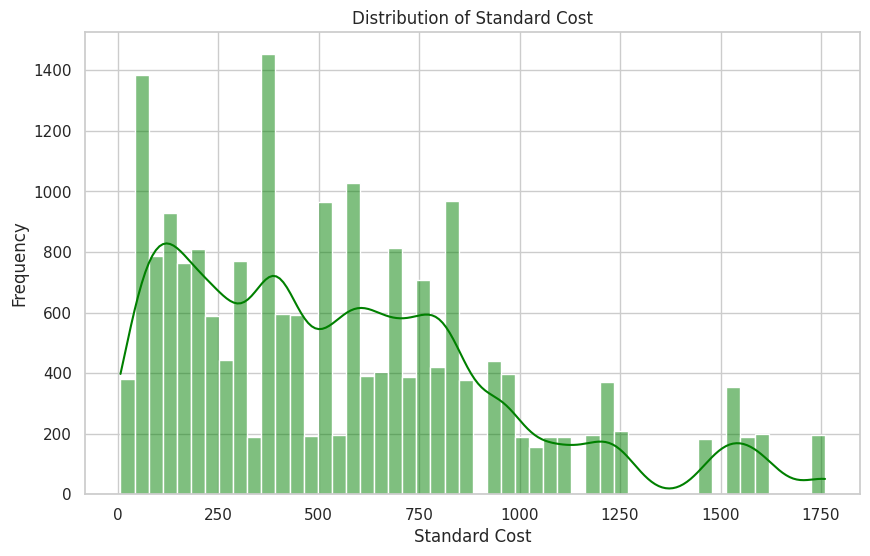

In [ ]:
# Distribution of Standard Cost
plt.figure(figsize=(10,6))
sns.histplot(data=merged_data2, x='standard_cost',bins=50, kde=True,color='green')
plt.title('Distribution of Standard Cost')
plt.xlabel('Standard Cost')
plt.ylabel('Frequency')
plt.show()

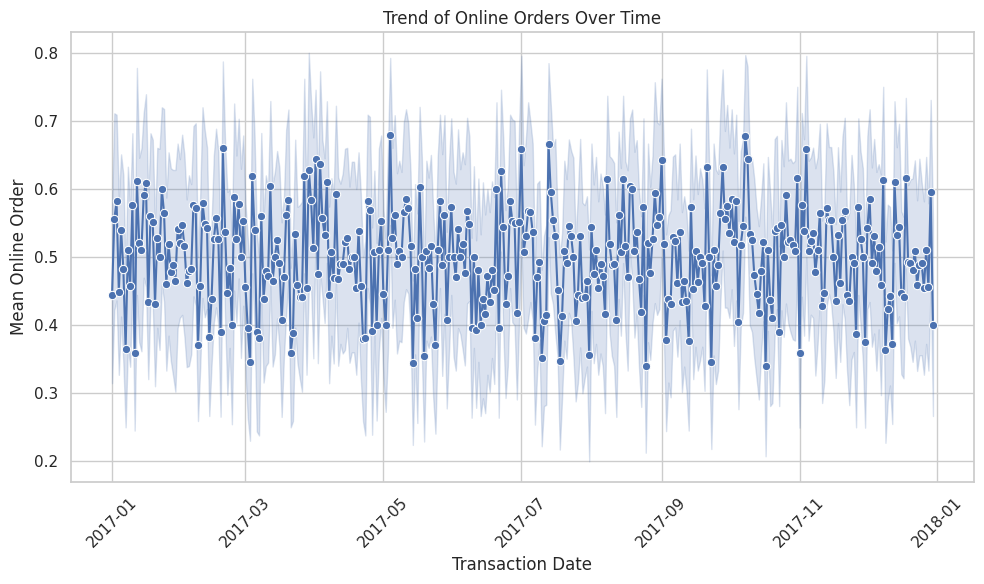

In [ ]:
# Relationship between Transaction Date and Online Order

# Ensure transaction_date is in datetime format
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

# Reset the index if transaction_date is the index
if isinstance(transaction_df.index, pd.PeriodIndex):     # We use isinstance() to check if the index of transaction_df is a pd.PeriodIndex.
    transaction_df.reset_index(inplace=True)

# Plotting the trend of online orders over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='transaction_date', y='online_order', data=transaction_df, marker='o')
plt.title('Trend of Online Orders Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Mean Online Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Customer wealth segment by age

# Calculate the percentage of each wealth segment by age group
wealth_by_age = merged_data2.groupby(['age', 'wealth_segment']).size().unstack(fill_value=0)
   ## unstack: used to pivot a level of the index labels into columns
   ## fill_value: fill missing values that occur after the unstacking operation

# Add a total column
wealth_by_age['Total'] = wealth_by_age.sum(axis=1)

# Calculate the percentage for each wealth segment
for col in wealth_by_age.columns[:-1]:  # Exclude the 'Total' column
    wealth_by_age[f'{col}_Percentage'] = (wealth_by_age[col] / wealth_by_age['Total']) * 100

# Display the percentage of each wealth segment by age
print(wealth_by_age[[col for col in wealth_by_age.columns if '_Percentage' in col]])

wealth_segment  Affluent Customer_Percentage  High Net Worth_Percentage  \
age                                                                       
18                                 24.770642                  14.678899   
19                                 27.884615                  30.769231   
20                                 30.534351                  24.809160   
21                                 18.696884                  27.478754   
22                                 23.097113                  19.685039   
23                                 29.494382                  10.955056   
24                                 35.570470                  18.344519   
25                                 33.045356                  22.894168   
26                                 21.172638                  37.459283   
27                                 26.100629                  33.647799   
28                                 23.346304                  19.455253   
29                       

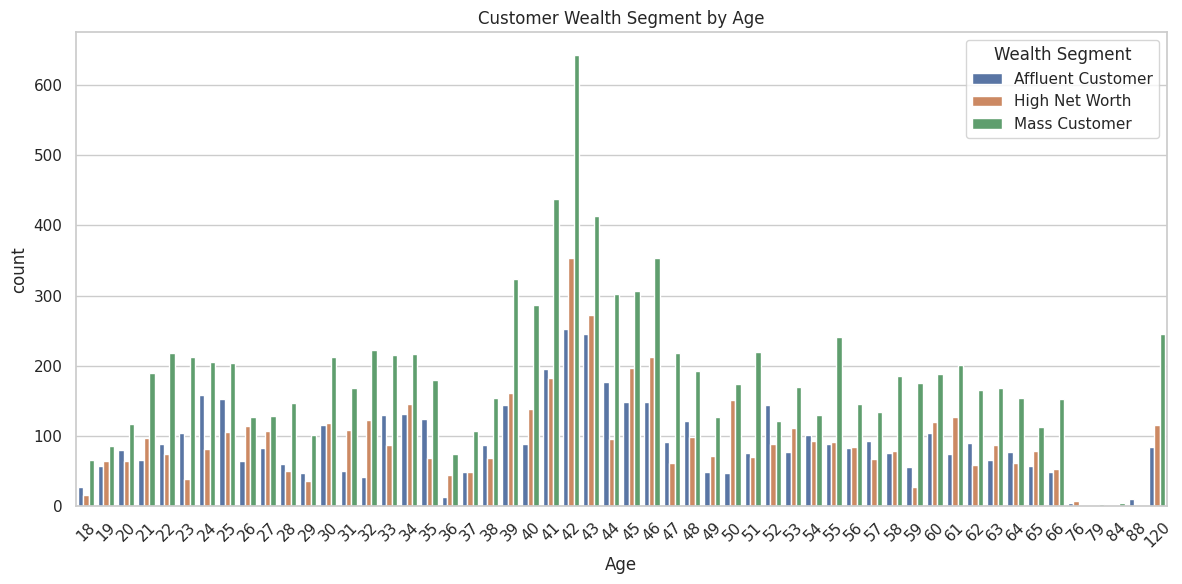

In [ ]:
# Ensure 'age' is numeric and 'wealth_segment' is categorical
merged_data2['age'] = pd.to_numeric(merged_data2['age'], errors='coerce')
merged_data2['wealth_segment'] = merged_data2['wealth_segment'].astype('category')

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='wealth_segment', data=merged_data2)
plt.title('Customer Wealth Segment by Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='Wealth Segment')
plt.tight_layout()
plt.show()

In [ ]:
# Checking unique categoreis present in the job_industry_category column
unique_categoreis = merged_data2 ['job_industry_category'].unique()
print("Unique job industry categories:", unique_categoreis)

Unique job industry categories: ['Health' 'Financial Services' 'Property' 'IT' 'Manufacturing' 'Retail'
 'Agriculture' 'Telecommunications' 'Entertainment']


In [ ]:
category_counts = merged_data2['job_industry_category'].value_counts()
print(category_counts)

job_industry_category
Manufacturing         7246
Financial Services    3886
Health                3099
Retail                1758
Property              1297
IT                    1084
Entertainment          698
Agriculture            578
Telecommunications     354
Name: count, dtype: int64


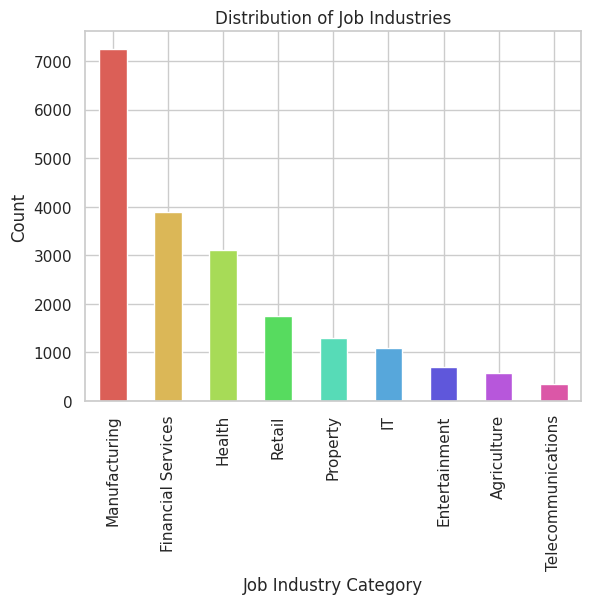

In [ ]:
# Distribution of job_industry_category

# Generate a colormap
cmap = sns.color_palette("hls", len(category_counts))

# Plot the bar chart with the colormap
ax = category_counts.plot(kind='bar', color=cmap)

plt.title('Distribution of Job Industries')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.show()

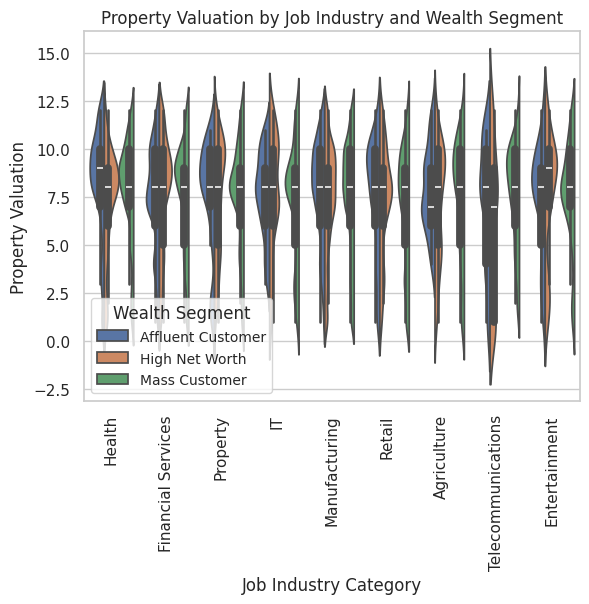

In [ ]:
# Create the violin plot
sns.violinplot(x='job_industry_category',
               y='property_valuation',
               hue='wealth_segment',
               split=True,
               data=merged_data2)

# Set the title and labels
plt.title('Property Valuation by Job Industry and Wealth Segment')
plt.xlabel('Job Industry Category')
plt.ylabel('Property Valuation')
plt.xticks(rotation=90)

# Access the legend and change the font size
legend = plt.legend(title='Wealth Segment')
for text in legend.get_texts():
    text.set_fontsize('small')  # Change 'small' to any valid size option like 'x-small', 'medium', etc.

# Show the plot
plt.show()

## RFM analysis

### Recency(R): How recently a customer made a purchase
### Frequency(F): How ofen they make purchases over a given period
### Monetary(M): How much money they spend in total

In [ ]:
# Ensure that transaction_date is in datetime format
merged_data2['transaction_date'] = pd.to_datetime(merged_data2['transaction_date'])

# Select the required columns
rfm_df = merged_data2[['customer_id','transaction_date','list_price']].copy


In [ ]:
# Calculate Recency
max_date = merged_data2['transaction_date'].max()

In [ ]:
# Since Receny should be calculated per customr, we group by 'customer_id' first
# Then we calculate the most recent transaction date for each customer
# finding the maximun trandaction date within each  group
last_transaction_dates = merged_data2.groupby('customer_id')['transaction_date'].max().reset_index()

In [ ]:
# Calculate the difference between max_date and the last transation date for each customer
last_transaction_dates['Recency'] = (max_date -last_transaction_dates['transaction_date']).dt.days

In [ ]:
# Display the last_transaction_dates Dataframe to see the results
print(last_transaction_dates.head())

   customer_id transaction_date  Recency
0            1       2017-12-23        7
1            2       2017-08-24      128
2            3       2017-09-19      102
3            4       2017-06-18      195
4            5       2017-12-14       16


In [ ]:
# Assuming df is your DataFrame and max_date is the overall most recent transaction date
rfm_summary = merged_data2 .groupby('customer_id').agg(
    {
        'transaction_date': lambda x: (max_date - x.max()).days,  # Calculate Recency
        'customer_id': 'count',  # Calculate Frequency
        'list_price': 'sum'  # Calculate Monetary Value
    }
)
rfm_summary.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
# Apply quantile-based ranking for each metric
rfm_summary['R_rank'] = pd.qcut(rfm_summary['Recency'], 5, labels=False)
rfm_summary['F_rank'] = pd.qcut(rfm_summary['Frequency'], 5, labels=False)
rfm_summary['M_rank'] = pd.qcut(rfm_summary['Monetary'], 5, labels=False)

# Create the RFM score
rfm_summary['RFM_Score'] = rfm_summary['R_rank'].map(str) + rfm_summary['F_rank'].map(str) + rfm_summary['M_rank'].map(str)

# Display the summary
print(rfm_summary.head())

             Recency  Frequency  Monetary  R_rank  F_rank  M_rank RFM_Score
customer_id                                                                
1                  7         11      9086       0       4       4       044
2                128          3      4150       4       0       1       401
3                102          8      9888       4       3       4       434
4                195          2      1048       4       0       0       400
5                 16          6      5905       1       2       2       122


# Cohort Analysis

In [ ]:
print(merged_data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20000 non-null  int64         
 1   transaction_id                       20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  int64         
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price     

In [ ]:
# Group by -> count
merged_data2['product_line'].value_counts()

,count
product_line,
Standard,14373
Road,3970
Touring,1234
Mountain,423


In [ ]:
merged_data2['product_line'].value_counts().index[0]

'Standard'

In [ ]:
print(merged_data2.info())
for col in merged_data2.columns:
  # Check if the column is of object type
  if merged_data2[col].dtypes == 'object':
     # Impute with the most frequent value
       merged_data2[col] = merged_data2[col].fillna(merged_data2[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(merged_data2.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20000 non-null  int64         
 1   transaction_id                       20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  int64         
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price     

## Assigned the cohorts and calculated the monthly offset

In [ ]:
dt.datetime(merged_data2['transaction_date'][1].year, merged_data2['transaction_date'][1].month,1)      ###  still confused

# merged_data2['transaction_date'][1] : This selects the second row (index 1, as indexing starts at 0)

datetime.datetime(2017, 3, 1, 0, 0)

In [ ]:
# # Define the function to extract the first day of the month
def get_month(x):
  return dt.datetime(x.year, x.month,1)
# Create transaction_date column based on month and store in Transaction month
merged_data2['TransactionMonth'] = merged_data2['transaction_date'].apply(get_month)
merged_data2

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit,TransactionMonth
0,1,14486,23,2017-03-27,0,Approved,Norco Bicycles,Mountain,low,small,...,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,76,2017-03-01
10,1,13644,25,2017-05-19,0,Approved,Giant Bicycles,Road,medium,medium,...,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,709,2017-05-01
9,1,15663,32,2017-06-04,1,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,432,2017-06-01
7,1,3765,38,2017-04-06,1,Approved,Solex,Standard,medium,medium,...,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,751,2017-04-01
6,1,14931,31,2017-12-14,1,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,58,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,3500,19836,40,2017-03-14,1,Approved,OHM Cycles,Standard,high,medium,...,N,No,17,9491 Green Ridge Terrace,2100,NSW,Australia,10,583,2017-03-01
19996,3500,8416,74,2017-02-16,0,Approved,WeareA2B,Standard,medium,medium,...,N,No,17,9491 Green Ridge Terrace,2100,NSW,Australia,10,827,2017-02-01
19998,5034,16701,0,2017-01-27,0,Approved,Norco Bicycles,Standard,medium,medium,...,N,Yes,11,3 Mariners Cove Terrace,2988,NSW,Australia,8,90,2017-01-01
19997,5034,8708,0,2017-10-07,0,Approved,Solex,Road,medium,medium,...,N,Yes,11,3 Mariners Cove Terrace,2988,NSW,Australia,8,104,2017-10-01


In [ ]:
merged_data2.groupby('customer_id')['TransactionMonth'].min()

,TransactionMonth
customer_id,
1,2017-01-01
2,2017-05-01
3,2017-02-01
4,2017-04-01
5,2017-03-01
...,...
3497,2017-09-01
3498,2017-02-01
3499,2017-01-01


In [ ]:
merged_data2.groupby('customer_id')['TransactionMonth'].transform('min')

,TransactionMonth
0,2017-01-01
10,2017-01-01
9,2017-01-01
7,2017-01-01
6,2017-01-01
...,...
19992,2017-01-01
19996,2017-01-01
19998,2017-01-01
19997,2017-01-01


In [ ]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth Value to the dataset
merged_data2['CohortMonth'] = merged_data2.groupby('customer_id')['TransactionMonth'].transform('min')
# printing top 5 rows
merged_data2.head()

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,profit,TransactionMonth,CohortMonth
0,1,14486,23,2017-03-27,0,Approved,Norco Bicycles,Mountain,low,small,...,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,76,2017-03-01,2017-01-01
10,1,13644,25,2017-05-19,0,Approved,Giant Bicycles,Road,medium,medium,...,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,709,2017-05-01,2017-01-01
9,1,15663,32,2017-06-04,1,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,432,2017-06-01,2017-01-01
7,1,3765,38,2017-04-06,1,Approved,Solex,Standard,medium,medium,...,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,751,2017-04-01,2017-01-01
6,1,14931,31,2017-12-14,1,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,58,2017-12-01,2017-01-01


# Calculating time offset in Month as Cohort Index

## Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

## First, we will create 6 variables that capture the integer value of years,months, and days for transaction and cohort date using the get_date_int() function.

In [ ]:
def get_date_int(df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year,month,day

  #Getting the integers for date parts from the 'InvoiceDay' column
  transcation_year, transaction_month, _ = get_date_int(merged_data2, 'TransactionMonth' )
  # Getting the integers for date parts from the 'CohortDay' column
  Cohort_year, cohort_month, _get_date_int(merged_data2,'CohortMonth')

### Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total months difference betweem the two. This will be our month's offset or cohort index, which we will use in the next section to calculate the retention rate.



In [ ]:
 # Ensure 'TransactionMonth' and 'CohortMonth' are of datetime type
 merged_data2['TransactionMonth'] = pd.to_datetime(merged_data2['TransactionMonth'])
 merged_data2['CohortMonth'] = pd.to_datetime(merged_data2['CohortMonth'])

#  EXtract years and months from the 'TransactionMonth' and 'CohortMonth'
merged_data2['Transaction_year'] = merged_data2['TransactionMonth'].dt.year
merged_data2['Transaction_month'] = merged_data2['TransactionMonth'].dt.month
merged_data2['Cohort_year'] = merged_data2['CohortMonth'].dt.year
merged_data2['Cohort_month']= merged_data2['CohortMonth'].dt.month

# Calculate difference in years
years_diff = merged_data2['Transaction_year'] - merged_data2['Cohort_year']

# Calculate difference in months
months_diff = merged_data2['Transaction_month'] - merged_data2['Cohort_month']

# Extract the difference in months from all previous values
# "+1" is added so that the first month is marked as 1 instead of 0
merged_data2['CohortIndex'] = years_diff * 12 + months_diff +1

print(merged_data2.head(5))


    customer_id  transaction_id  product_id transaction_date  online_order  \
0             1           14486          23       2017-03-27             0   
10            1           13644          25       2017-05-19             0   
9             1           15663          32       2017-06-04             1   
7             1            3765          38       2017-04-06             1   
6             1           14931          31       2017-12-14             1   

   order_status           brand product_line product_class product_size  ...  \
0      Approved  Norco Bicycles     Mountain           low        small  ...   
10     Approved  Giant Bicycles         Road        medium       medium  ...   
9      Approved  Giant Bicycles     Standard        medium       medium  ...   
7      Approved           Solex     Standard        medium       medium  ...   
6      Approved  Giant Bicycles     Standard        medium       medium  ...   

      country  property_valuation  profit Transact

In [ ]:
df1 = merged_data2.groupby(['customer_id'])['profit'].sum().reset_index()
df1['rank_M'] = df1['profit'].rank(ascending = False)

In [ ]:
df_48 = merged_data2[(merged_data2['CohortMonth'] == '2017-01-01') & (merged_data2['CohortIndex'] == 3)]

In [ ]:
df_31 = merged_data2[(merged_data2['CohortMonth'] == '2017-07-01') & (merged_data2['CohortIndex'] == 5)]


### Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

### Then, we call this object, select the customer_id column and calculate the average.

### Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

###Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.


In [ ]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = merged_data2.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [ ]:
cohort_data.pivot(index='CohortMonth', columns = 'CohortIndex', values = 'customer_id' )

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

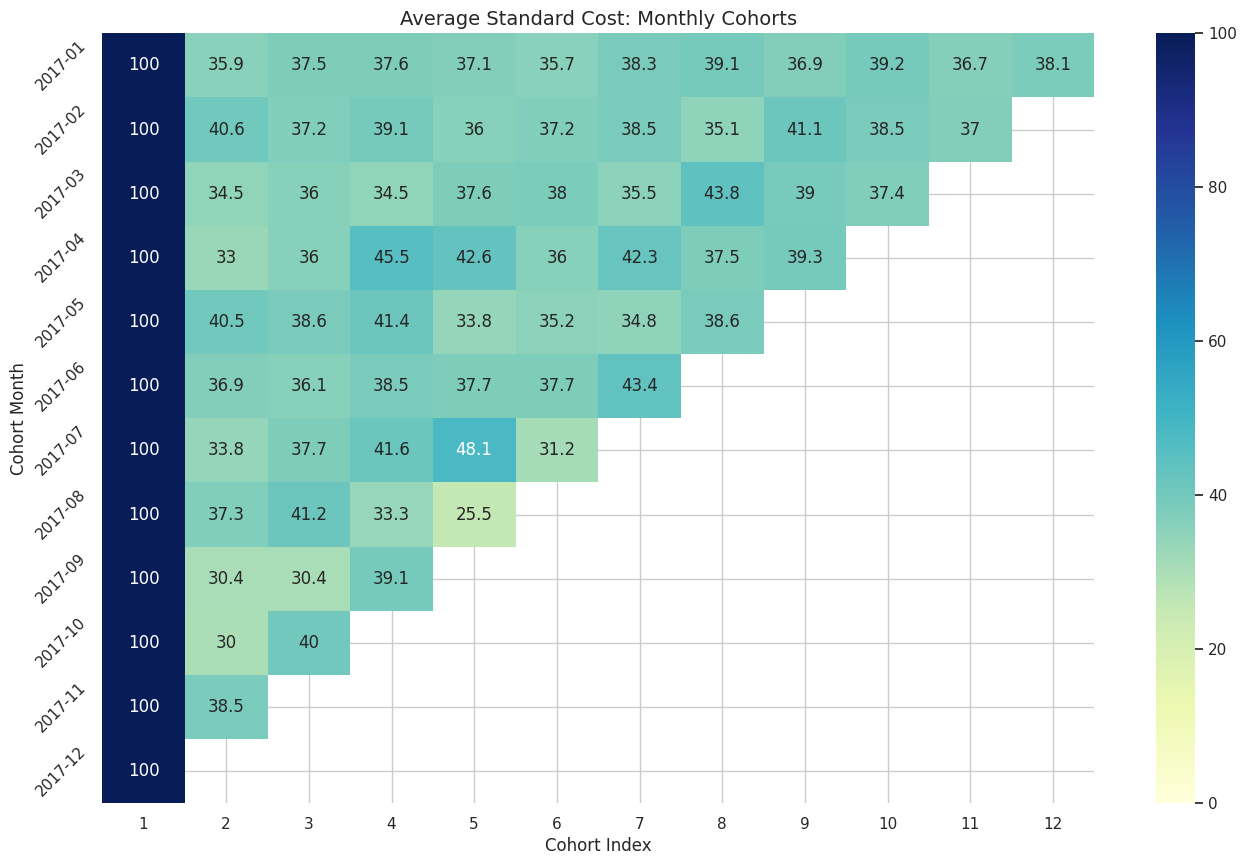

In [ ]:
# Rounds the retention values to three decimal places
# And multiplies them by 100 to convert them to percentage
retention = retention.round(3)*100
# Ensures the index is formatted as 'YYYY-MM'
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
# labeling axes
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
# Adjust y_tick labels, set rotation to 45 degrees
plt.yticks( rotation=45)
plt.show()